In [1]:
# === Cell 1: Mount Google Drive and import libraries ===

from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

base_dir = "/content/drive/MyDrive/COGS118A_Final_Project"
results_dir = os.path.join(base_dir, "Results")

print("Base dir:", base_dir)
print("Results dir:", results_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base dir: /content/drive/MyDrive/COGS118A_Final_Project
Results dir: /content/drive/MyDrive/COGS118A_Final_Project/Results


In [2]:
# === Cell 2: Load summary CSVs for all three datasets ===

eeg_eye_summary_path      = os.path.join(results_dir, "eeg_eye_results_summary.csv")
beed_summary_path         = os.path.join(results_dir, "beed_results_summary.csv")
parkinsons_summary_path   = os.path.join(results_dir, "pdcls_results_summary.csv")

eeg_eye_summary    = pd.read_csv(eeg_eye_summary_path)
beed_summary       = pd.read_csv(beed_summary_path)
parkinsons_summary = pd.read_csv(parkinsons_summary_path)

print("EEG Eye State summary:")
display(eeg_eye_summary.head())

print("\nBEED summary:")
display(beed_summary.head())

print("\nParkinsons summary:")
display(parkinsons_summary.head())

EEG Eye State summary:


,model,train_size,mean_test_acc,std_test_acc,mean_train_acc,mean_cv_acc
0,LogisticRegression,0.2,0.640076,0.001253,0.648309,0.644863
1,LogisticRegression,0.5,0.637517,0.016320,0.634490,0.630396
2,LogisticRegression,0.8,0.626947,0.007679,0.629812,0.627976
3,MLP,0.2,0.915721,0.003427,0.974299,0.909100
4,MLP,0.5,0.936093,0.016418,0.970628,0.931197



BEED summary:


,model,train_size,mean_test_acc,std_test_acc,mean_train_acc,mean_cv_acc
0,LogisticRegression,0.2,0.473333,0.012138,0.500625,0.483958
1,LogisticRegression,0.5,0.476250,0.015994,0.498000,0.487167
2,LogisticRegression,0.8,0.478542,0.009485,0.488281,0.481562
3,MLP,0.2,0.873802,0.007940,0.935208,0.867292
4,MLP,0.5,0.938583,0.006237,0.988583,0.917333



Parkinsons summary:


,model,train_size,mean_test_acc,std_test_acc,mean_train_acc,mean_cv_acc
0,LogisticRegression,0.2,0.852564,0.016960,0.871795,0.845238
1,LogisticRegression,0.5,0.836735,0.030612,0.917526,0.879825
2,LogisticRegression,0.8,0.846154,0.067840,0.882479,0.852755
3,MLP,0.2,0.790598,0.064209,0.837607,0.777381
4,MLP,0.5,0.799320,0.032802,0.859107,0.841930


In [3]:
# === Cell 3: Add dataset labels and combine ===

eeg_eye_summary["dataset"]    = "EEG Eye State"
beed_summary["dataset"]       = "BEED Epilepsy"
parkinsons_summary["dataset"] = "Parkinsons"

combined_summary = pd.concat(
    [eeg_eye_summary, beed_summary, parkinsons_summary],
    ignore_index=True
)

print("Combined summary (first 10 rows):")
display(combined_summary.head(10))

Combined summary (first 10 rows):


,model,train_size,mean_test_acc,std_test_acc,mean_train_acc,mean_cv_acc,dataset
0,LogisticRegression,0.2,0.640076,0.001253,0.648309,0.644863,EEG Eye State
1,LogisticRegression,0.5,0.637517,0.016320,0.634490,0.630396,EEG Eye State
2,LogisticRegression,0.8,0.626947,0.007679,0.629812,0.627976,EEG Eye State
3,MLP,0.2,0.915721,0.003427,0.974299,0.909100,EEG Eye State
4,MLP,0.5,0.936093,0.016418,0.970628,0.931197,EEG Eye State
5,MLP,0.8,0.894860,0.019374,0.932493,0.899923,EEG Eye State
6,RandomForest,0.2,0.873025,0.005010,1.000000,0.872167,EEG Eye State
7,RandomForest,0.5,0.916155,0.003499,1.000000,0.908411,EEG Eye State
8,RandomForest,0.8,0.932799,0.004724,1.000000,0.925317,EEG Eye State
9,SVM_RBF,0.2,0.936805,0.004047,1.000000,0.931128,EEG Eye State


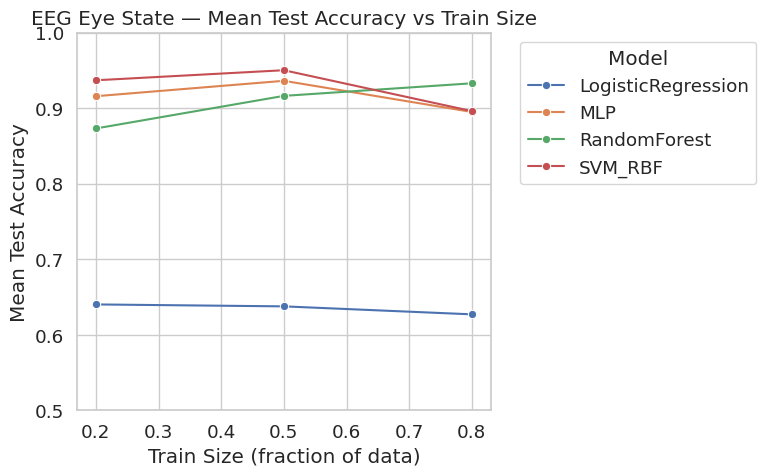

In [4]:
# === Cell 4A: EEG Eye State — Test Accuracy vs Train Size ===

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=eeg_eye_summary,
    x="train_size",
    y="mean_test_acc",
    hue="model",
    marker="o"
)
plt.title("EEG Eye State — Mean Test Accuracy vs Train Size")
plt.xlabel("Train Size (fraction of data)")
plt.ylabel("Mean Test Accuracy")
plt.ylim(0.5, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/eye_state_testacc_vs_trainsize.png", dpi=300, bbox_inches='tight')
plt.show()

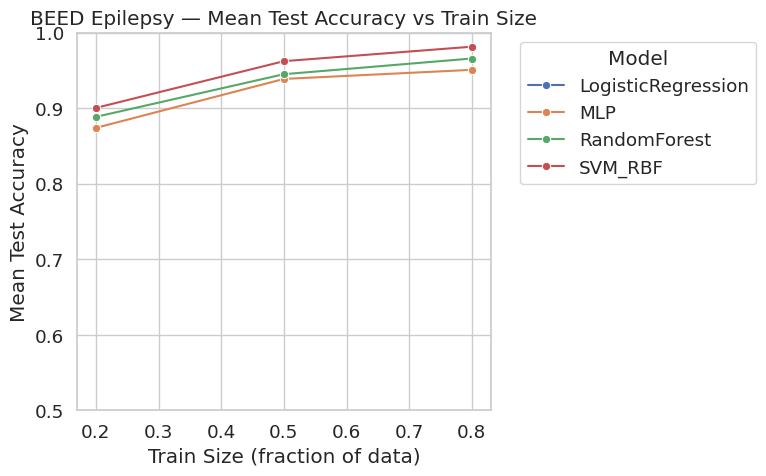

In [5]:
# === Cell 4B: BEED Epilepsy — Test Accuracy vs Train Size ===

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=beed_summary,
    x="train_size",
    y="mean_test_acc",
    hue="model",
    marker="o"
)
plt.title("BEED Epilepsy — Mean Test Accuracy vs Train Size")
plt.xlabel("Train Size (fraction of data)")
plt.ylabel("Mean Test Accuracy")
plt.ylim(0.5, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/beed_testacc_vs_trainsize.png", dpi=300, bbox_inches='tight')
plt.show()

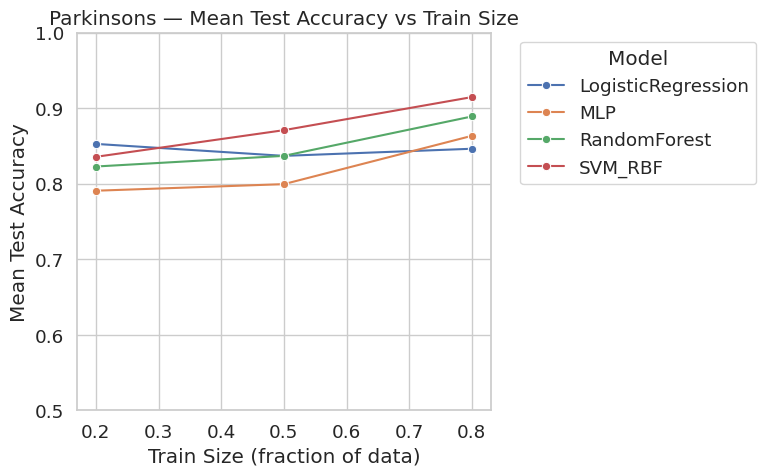

In [6]:
# === Cell 4C: Parkinsons — Test Accuracy vs Train Size ===

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=parkinsons_summary,
    x="train_size",
    y="mean_test_acc",
    hue="model",
    marker="o"
)
plt.title("Parkinsons — Mean Test Accuracy vs Train Size")
plt.xlabel("Train Size (fraction of data)")
plt.ylabel("Mean Test Accuracy")
plt.ylim(0.5, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/parkinsons_testacc_vs_trainsize.png", dpi=300, bbox_inches='tight')
plt.show()

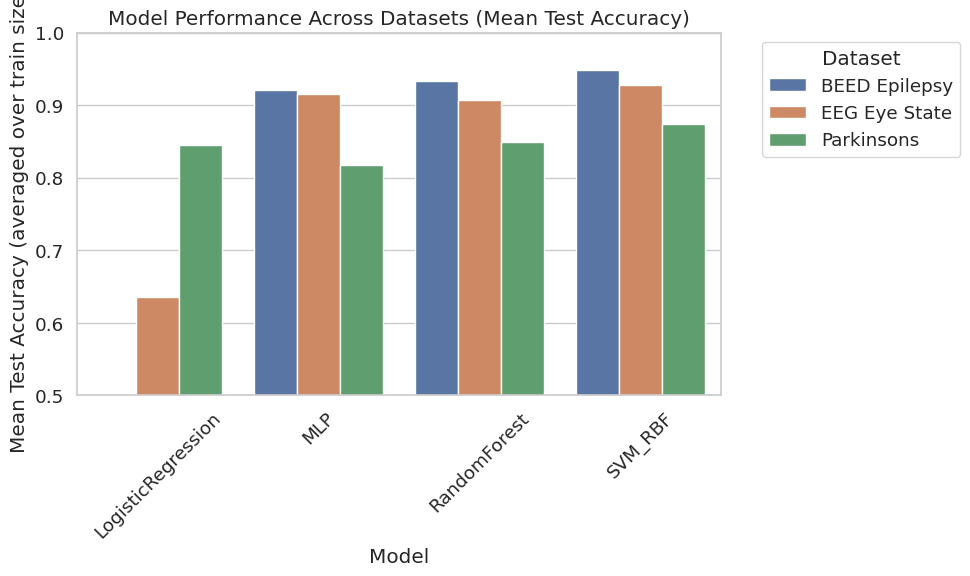

In [7]:
# === Cell 5: Model performance across datasets (averaged over train sizes) ===

overall_summary = (
    combined_summary
    .groupby(["dataset", "model"], as_index=False)
    .agg(mean_test_acc=("mean_test_acc", "mean"))
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=overall_summary,
    x="model",
    y="mean_test_acc",
    hue="dataset"
)
plt.title("Model Performance Across Datasets (Mean Test Accuracy)")
plt.xlabel("Model")
plt.ylabel("Mean Test Accuracy (averaged over train sizes)")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/model_comparison_across_datasets.png", dpi=300, bbox_inches='tight')
plt.show()

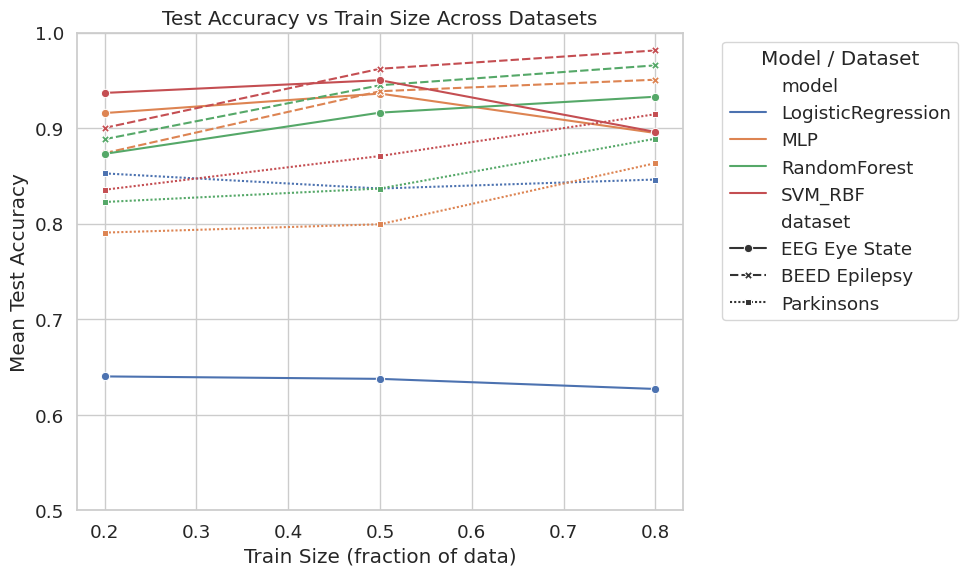

In [8]:
# === Cell 6: Test Accuracy vs Train Size Across All Datasets ===

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=combined_summary,
    x="train_size",
    y="mean_test_acc",
    hue="model",
    style="dataset",
    markers=True
)
plt.title("Test Accuracy vs Train Size Across Datasets")
plt.xlabel("Train Size (fraction of data)")
plt.ylabel("Mean Test Accuracy")
plt.ylim(0.5, 1.0)
plt.legend(title="Model / Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/combined_testacc_vs_trainsize.png", dpi=300, bbox_inches='tight')
plt.show()

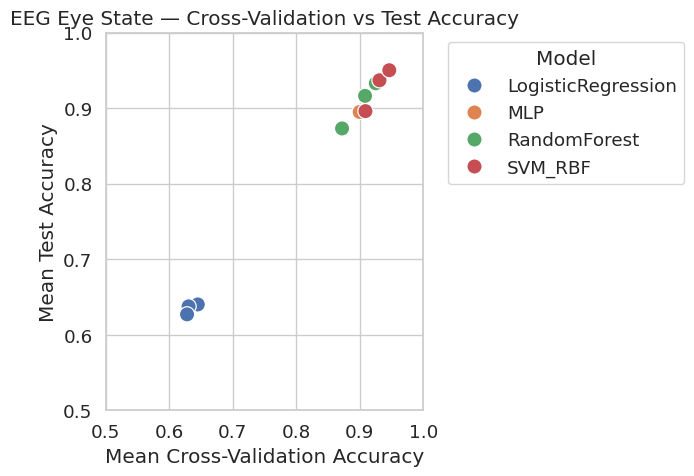

In [9]:
# === Cell 7A: EEG Eye State — Cross-Validation vs Test Accuracy ===

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=eeg_eye_summary,
    x="mean_cv_acc",
    y="mean_test_acc",
    hue="model",
    s=120
)
plt.title("EEG Eye State — Cross-Validation vs Test Accuracy")
plt.xlabel("Mean Cross-Validation Accuracy")
plt.ylabel("Mean Test Accuracy")
plt.xlim(0.5, 1.0)
plt.ylim(0.5, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/eye_state_cv_vs_testacc.png", dpi=300, bbox_inches='tight')
plt.show()

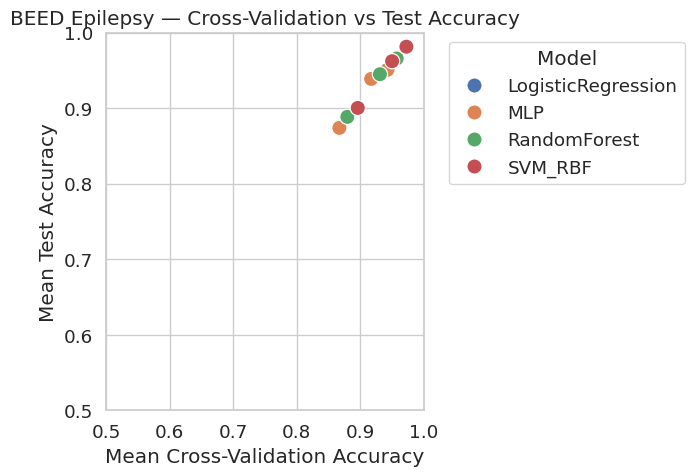

In [10]:
# === Cell 7B: BEED — Cross-Validation vs Test Accuracy ===

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=beed_summary,
    x="mean_cv_acc",
    y="mean_test_acc",
    hue="model",
    s=120
)
plt.title("BEED Epilepsy — Cross-Validation vs Test Accuracy")
plt.xlabel("Mean Cross-Validation Accuracy")
plt.ylabel("Mean Test Accuracy")
plt.xlim(0.5, 1.0)
plt.ylim(0.5, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/beed_cv_vs_testacc.png", dpi=300, bbox_inches='tight')
plt.show()

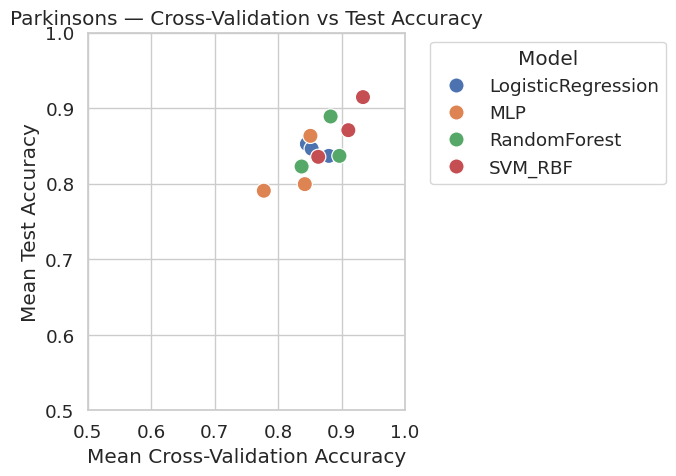

In [11]:
# === Cell 7C: Parkinsons — Cross-Validation vs Test Accuracy ===

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=parkinsons_summary,
    x="mean_cv_acc",
    y="mean_test_acc",
    hue="model",
    s=120
)
plt.title("Parkinsons — Cross-Validation vs Test Accuracy")
plt.xlabel("Mean Cross-Validation Accuracy")
plt.ylabel("Mean Test Accuracy")
plt.xlim(0.5, 1.0)
plt.ylim(0.5, 1.0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/parkinsons_cv_vs_testacc.png", dpi=300, bbox_inches='tight')
plt.show()

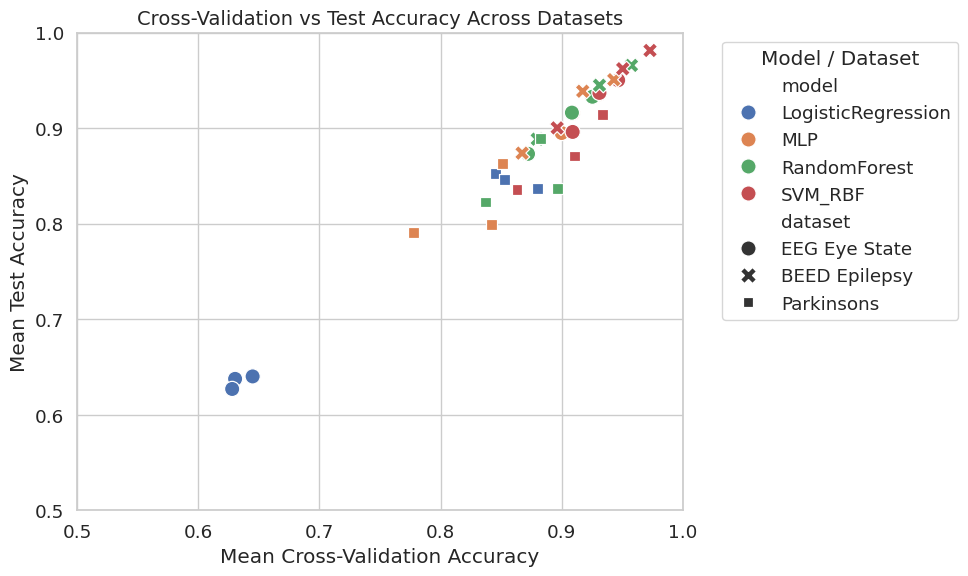

In [12]:
# === Combined — Cross-Validation vs Test Accuracy Across All Datasets ===

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_summary,
    x="mean_cv_acc",
    y="mean_test_acc",
    hue="model",
    style="dataset",
    s=120
)

plt.title("Cross-Validation vs Test Accuracy Across Datasets", fontsize=14)
plt.xlabel("Mean Cross-Validation Accuracy")
plt.ylabel("Mean Test Accuracy")
plt.xlim(0.5, 1.0)
plt.ylim(0.5, 1.0)

plt.legend(title="Model / Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/COGS118A_Final_Project/Plots/combined_cv_vs_testacc.png", dpi=300, bbox_inches='tight')
plt.show()